In [1]:
import torch
import numpy as np


In [2]:
X = torch.linspace(1,50,50).reshape(-1,1)
X.shape

torch.Size([50, 1])

In [3]:
X

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

In [4]:
e = torch.randint(-8,9,(50,1), dtype=torch.float)

In [5]:
y= 2*X+1+e
y.shape

torch.Size([50, 1])

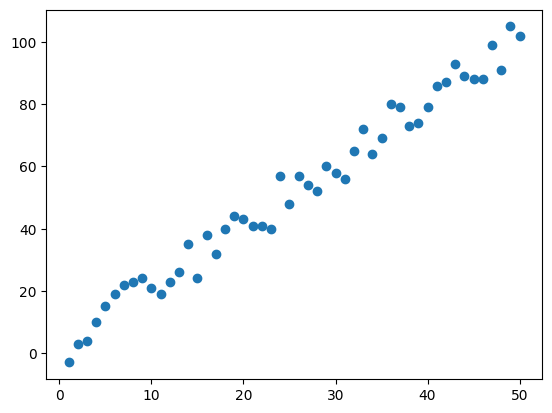

In [6]:
import matplotlib.pyplot as plt
plt.scatter(X.numpy(), y.numpy())

In [7]:
#before we test a linear model, lets first check how it works and how it sets up the weights and biases and because the 
#model is untrained we are expecting random values for weights and biases
import torch.nn as nn

model= nn.Linear(in_features=1, out_features=1)
print(model.weight,'\n', model.bias)

Parameter containing:
tensor([[0.5516]], requires_grad=True) 
 Parameter containing:
tensor([0.7338], requires_grad=True)


In [8]:
#defining the model: in PyTorch we define our model as a class
class Model(nn.Module):
    def __init__(self, in_features, out_features):
        super().__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred


In [9]:
model = Model(1,1)

In [10]:
print(model)

Model(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [11]:
#loss function
criterion = nn.MSELoss()

In [12]:
#optimizer
optimizer = torch.optim.SGD(model.parameters(),lr=0.001)

In [21]:
#training the model:
epochs =50
losses = []
for i in range(epochs):
    i+=1
    y_pred = model.forward(X)   #prediction
    loss = criterion(y_pred,y)  #loss
    losses.append(loss)
    print(f'Epoch: {i} loss: {loss.item()}')
    #gradients accumulate with every backprop, to prevent compounding we need to reset the stored gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()    #updates the hyperparameters of our model



Epoch: 1 loss: 19.544347763061523
Epoch: 2 loss: 19.544076919555664
Epoch: 3 loss: 19.543813705444336
Epoch: 4 loss: 19.543542861938477
Epoch: 5 loss: 19.543275833129883
Epoch: 6 loss: 19.543012619018555
Epoch: 7 loss: 19.542743682861328
Epoch: 8 loss: 19.542478561401367
Epoch: 9 loss: 19.542211532592773
Epoch: 10 loss: 19.541946411132812
Epoch: 11 loss: 19.54168128967285
Epoch: 12 loss: 19.54141616821289
Epoch: 13 loss: 19.541149139404297
Epoch: 14 loss: 19.540884017944336
Epoch: 15 loss: 19.54062271118164
Epoch: 16 loss: 19.540359497070312
Epoch: 17 loss: 19.54009437561035
Epoch: 18 loss: 19.539831161499023
Epoch: 19 loss: 19.539566040039062
Epoch: 20 loss: 19.539304733276367
Epoch: 21 loss: 19.539039611816406
Epoch: 22 loss: 19.53877830505371
Epoch: 23 loss: 19.53851890563965
Epoch: 24 loss: 19.538253784179688
Epoch: 25 loss: 19.537992477416992
Epoch: 26 loss: 19.537731170654297
Epoch: 27 loss: 19.5374698638916
Epoch: 28 loss: 19.537208557128906
Epoch: 29 loss: 19.536949157714844
Ep

In [20]:
losses

[tensor(19.5581, grad_fn=<MseLossBackward0>),
 tensor(19.5578, grad_fn=<MseLossBackward0>),
 tensor(19.5575, grad_fn=<MseLossBackward0>),
 tensor(19.5572, grad_fn=<MseLossBackward0>),
 tensor(19.5570, grad_fn=<MseLossBackward0>),
 tensor(19.5567, grad_fn=<MseLossBackward0>),
 tensor(19.5564, grad_fn=<MseLossBackward0>),
 tensor(19.5561, grad_fn=<MseLossBackward0>),
 tensor(19.5558, grad_fn=<MseLossBackward0>),
 tensor(19.5556, grad_fn=<MseLossBackward0>),
 tensor(19.5553, grad_fn=<MseLossBackward0>),
 tensor(19.5550, grad_fn=<MseLossBackward0>),
 tensor(19.5547, grad_fn=<MseLossBackward0>),
 tensor(19.5544, grad_fn=<MseLossBackward0>),
 tensor(19.5542, grad_fn=<MseLossBackward0>),
 tensor(19.5539, grad_fn=<MseLossBackward0>),
 tensor(19.5536, grad_fn=<MseLossBackward0>),
 tensor(19.5533, grad_fn=<MseLossBackward0>),
 tensor(19.5531, grad_fn=<MseLossBackward0>),
 tensor(19.5528, grad_fn=<MseLossBackward0>),
 tensor(19.5525, grad_fn=<MseLossBackward0>),
 tensor(19.5522, grad_fn=<MseLossB

In [22]:
model.linear.weight

Parameter containing:
tensor([[2.0114]], requires_grad=True)

In [23]:
model.linear.bias

Parameter containing:
tensor([0.6367], requires_grad=True)

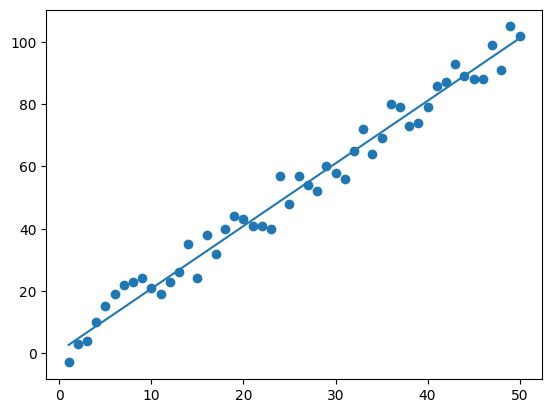

In [24]:
x1 = np.array([X.min(),X.max()])
w1,b1 = model.linear.weight.item(), model.linear.bias.item()
y1 = x1*w1 + b1
plt.scatter(X.numpy(), y.numpy())
plt.plot(x1, y1)

In [25]:
X

tensor([[ 1.],
        [ 2.],
        [ 3.],
        [ 4.],
        [ 5.],
        [ 6.],
        [ 7.],
        [ 8.],
        [ 9.],
        [10.],
        [11.],
        [12.],
        [13.],
        [14.],
        [15.],
        [16.],
        [17.],
        [18.],
        [19.],
        [20.],
        [21.],
        [22.],
        [23.],
        [24.],
        [25.],
        [26.],
        [27.],
        [28.],
        [29.],
        [30.],
        [31.],
        [32.],
        [33.],
        [34.],
        [35.],
        [36.],
        [37.],
        [38.],
        [39.],
        [40.],
        [41.],
        [42.],
        [43.],
        [44.],
        [45.],
        [46.],
        [47.],
        [48.],
        [49.],
        [50.]])

In [26]:
X.numpy()

array([[ 1.],
       [ 2.],
       [ 3.],
       [ 4.],
       [ 5.],
       [ 6.],
       [ 7.],
       [ 8.],
       [ 9.],
       [10.],
       [11.],
       [12.],
       [13.],
       [14.],
       [15.],
       [16.],
       [17.],
       [18.],
       [19.],
       [20.],
       [21.],
       [22.],
       [23.],
       [24.],
       [25.],
       [26.],
       [27.],
       [28.],
       [29.],
       [30.],
       [31.],
       [32.],
       [33.],
       [34.],
       [35.],
       [36.],
       [37.],
       [38.],
       [39.],
       [40.],
       [41.],
       [42.],
       [43.],
       [44.],
       [45.],
       [46.],
       [47.],
       [48.],
       [49.],
       [50.]], dtype=float32)